In [83]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



In [57]:
sns.set()  #set default theme from seaborn lib
warnings.filterwarnings('ignore')


print('hello')

In [58]:
#loading data from local folder
df=pd.read_csv('Data\Churn_Modelling_Logis.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [59]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


here we are checking  numerical columns

In [60]:
numerical_df=df.select_dtypes(exclude=np.object_).columns
df[numerical_df].head()

df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [61]:
#dropping few columns which won't contribute as per the domain knowledge
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

#let's do one hot endocoding to convert categorical column into numerical , here geography column is get cnverted 
geography_dummies=pd.get_dummies(data=df,prefix='Geo',columns=['Geography'])






In [62]:
#we can also use label encoding to convert categorical col into numerical 

geography_dummies=geography_dummies.replace(to_replace={'Gender':{'Male':1,'Female':0 }})
geography_dummies


,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


Exploratory data analysis started here- preprocessing complete above

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


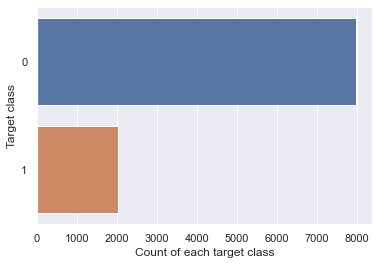

In [63]:
#first we will check if historical data Y value is not imbalanced class
%matplotlib inline

sns.countplot(y=geography_dummies['Exited'],data=geography_dummies,)
plt.xlabel(xlabel='Count of each target class')
plt.ylabel(ylabel='Target class')
geography_dummies


above shows historic data is an example of class imbalance , so will use oversampling to equal the samples


In [64]:
over_sampled = RandomOverSampler()
X = geography_dummies.drop(['Exited'],axis=1)
y=geography_dummies['Exited']
X_oversampled,y_oversampled=over_sampled.fit_resample(X,y)
y_oversampled.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Geo_France'}>,
        <AxesSubplot:title={'center':'Geo_Germany'}>],
       [<AxesSubplot:title={'center':'Geo_Spain'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

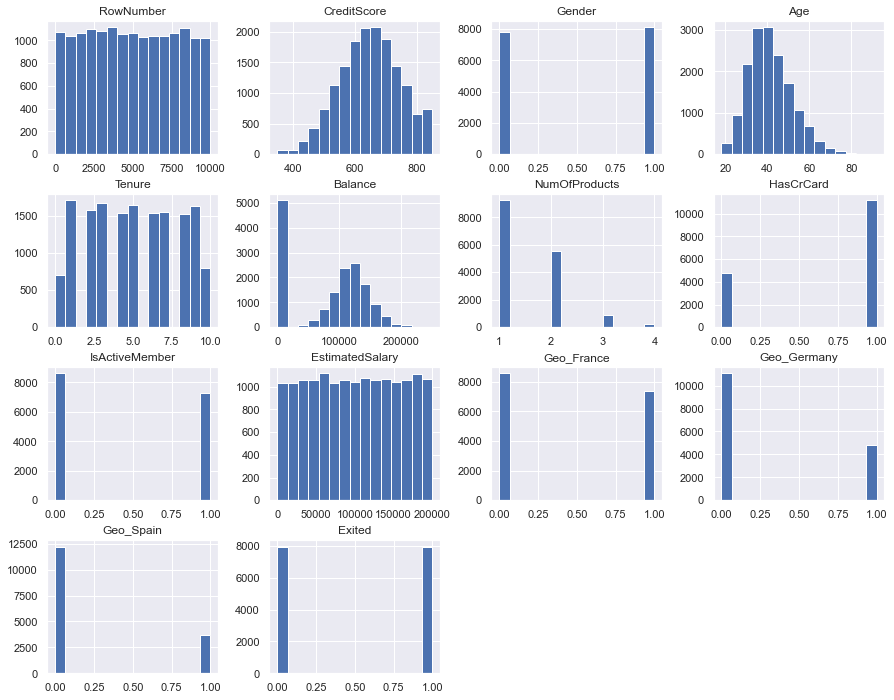

In [65]:
oversampled_df=pd.concat([X_oversampled,y_oversampled],axis=1)
oversampled_df.hist(bins=15,figsize=(15,12))

<AxesSubplot:>

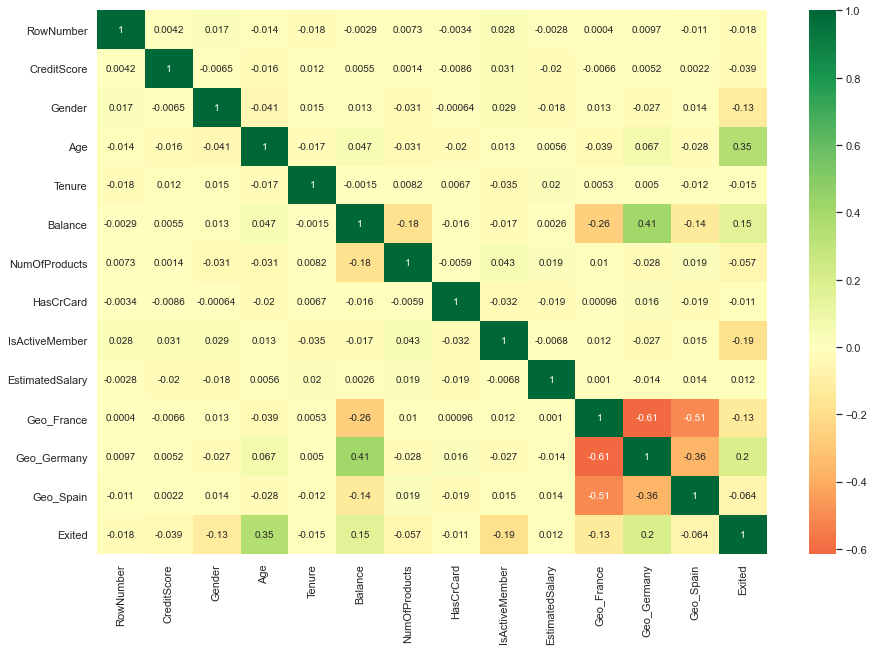

In [66]:
#let check the multicollinearity of features by checking correalation matric.
plt.figure(figsize=(15,10))
sns.heatmap(oversampled_df.corr(),center=0,cmap='RdYlGn',annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

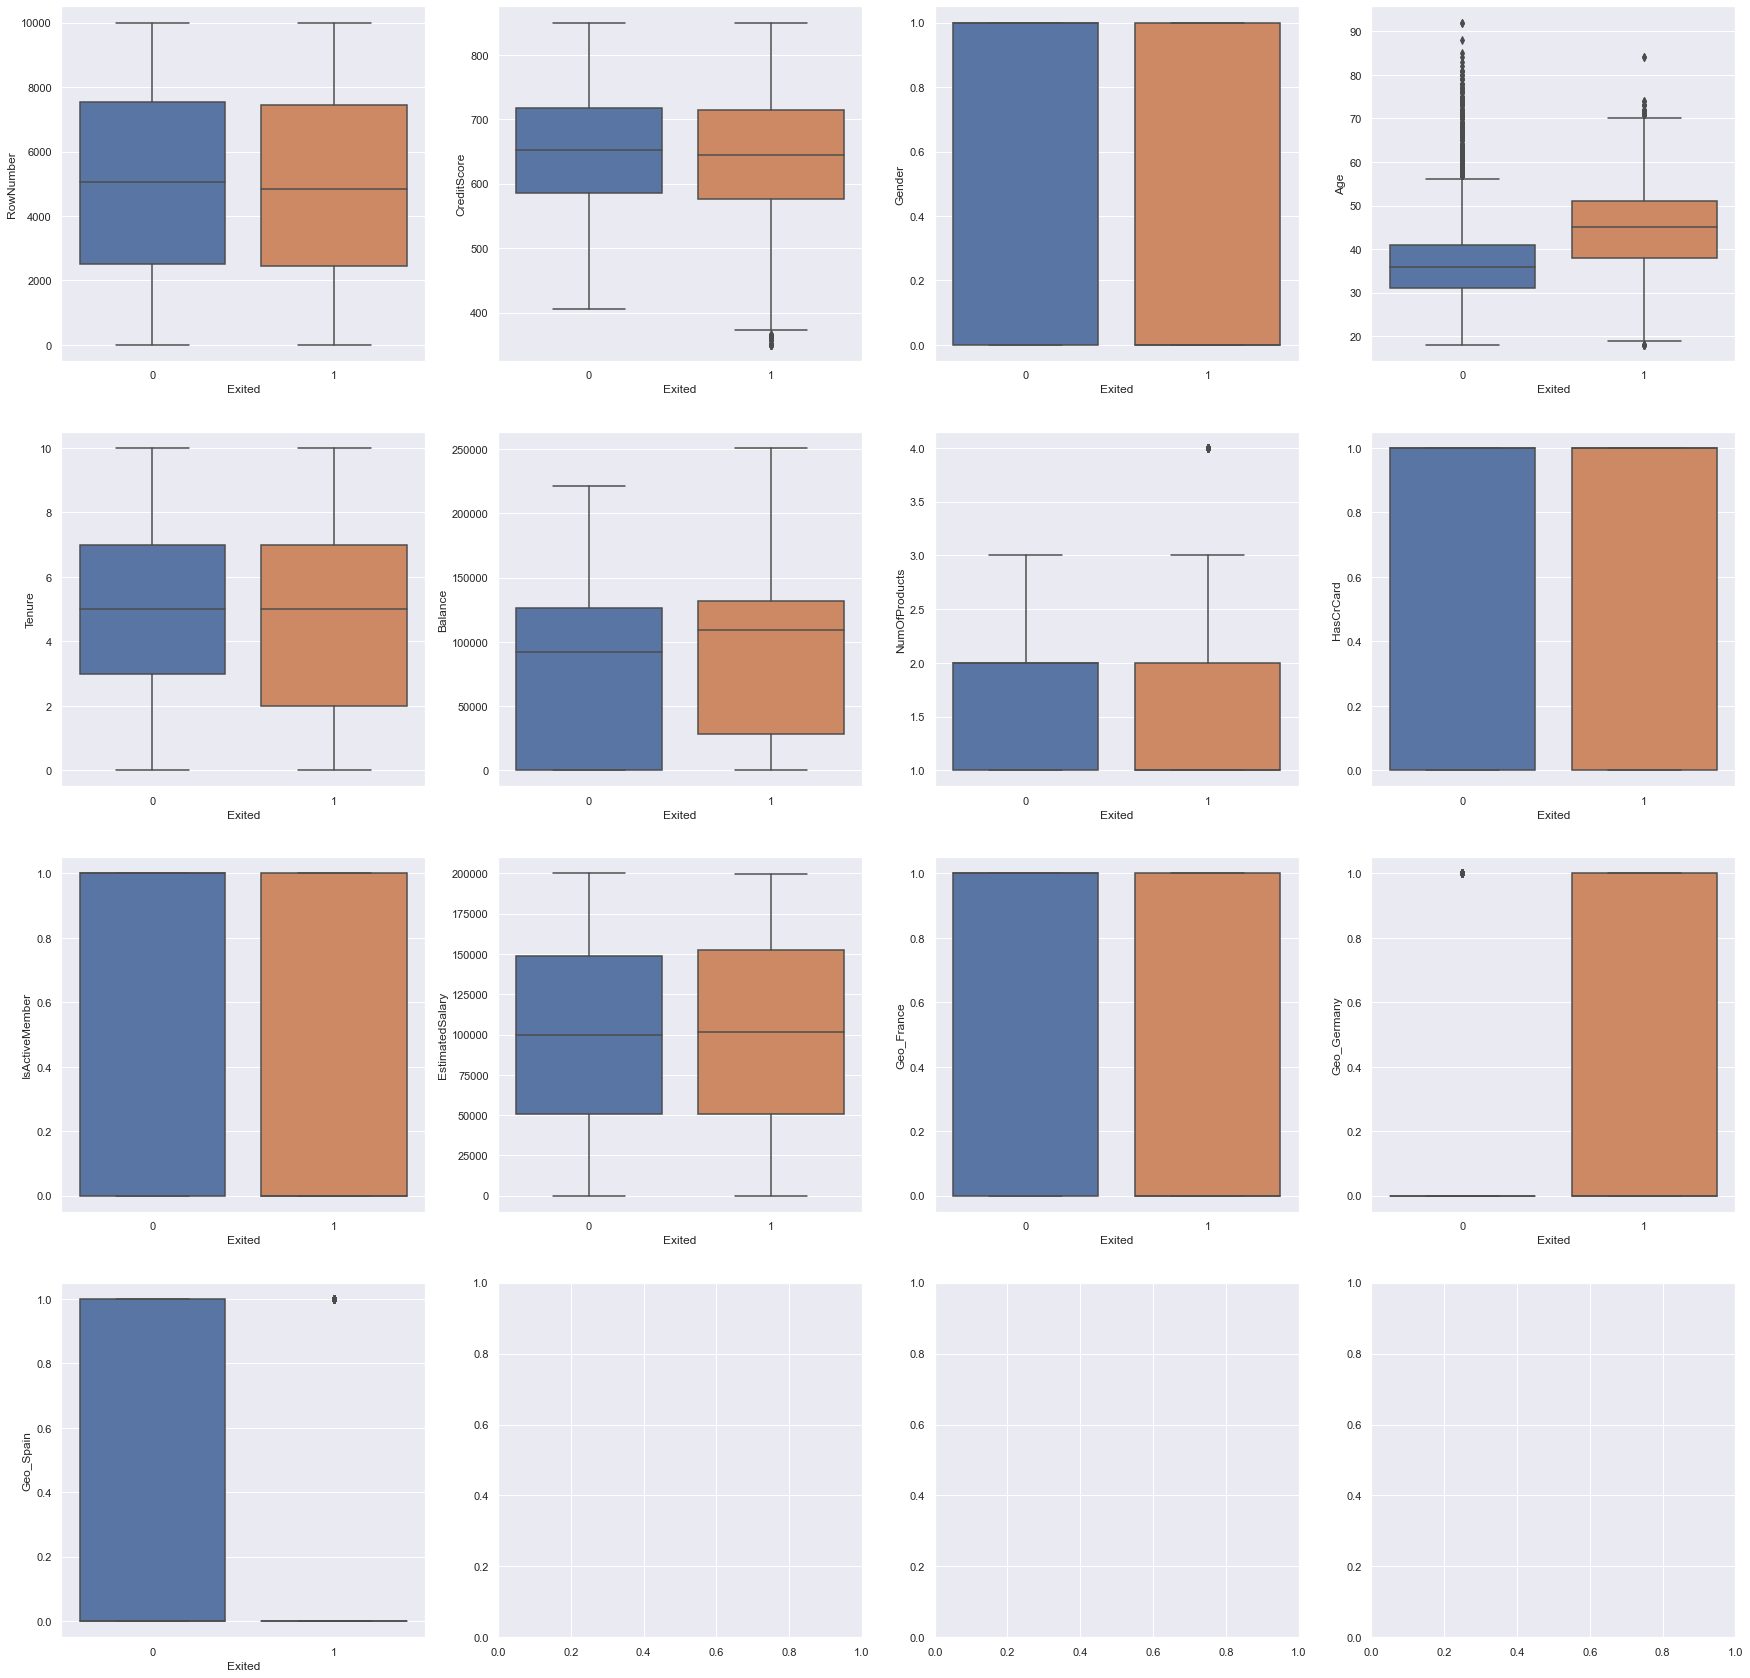

In [67]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(30,30))
len(oversampled_df.columns)
row=0
col=0
for i in range(len(oversampled_df.columns)-1):
    if col > 3:
        row += 1
        col = 0
    axi = ax[row,col]
    sns.boxplot(x=oversampled_df['Exited'],y=oversampled_df[oversampled_df.columns[i]],ax=axi)
    col+=1

plt.show


# Model building starts here


In [68]:
#splitting the dataset into the training set and test set and also scaling them in between 0 to 1 so that independent variable should not dominate the others
sc= StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X_oversampled,y_oversampled,test_size=0.33,random_state=0)
X_train=sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [69]:
#logistics regression classification
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [70]:
#Predication and peformance metric
y_predicted = lr.predict(X_test)
y_predicted_prob = lr.predict_proba(X_test)

#converting ndarray into series

y_predicted_pdseries = pd.Series(y_predicted)


In [71]:
#lets c accuracy
score_lr = lr.score(X_test,y_test) 
score_lr

0.7096651445966514

In [73]:
#lets get confussion matrix
actual = y_test
predicted = y_predicted
cf = confusion_matrix(actual,predicted)
print ('Confusion matrix')
print(cf)

Confusion matrix
[[1904  720]
 [ 806 1826]]


In [74]:
type(cf)

numpy.ndarray

In [88]:
print('sum of rows' + str(cf.sum(axis=1)))

sum of rows[2624 2632]


In [89]:
print('sum of columns' + str(cf.sum(axis=0)))

sum of columns[2710 2546]


In [85]:
#accuracy precision and recall 

precision = classification_report(actual,predicted)

In [87]:
print(precision)

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      2624
           1       0.72      0.69      0.71      2632

    accuracy                           0.71      5256
   macro avg       0.71      0.71      0.71      5256
weighted avg       0.71      0.71      0.71      5256

